# **PRÉ-PROCESSAMENTO**

#### Importação de dados e bibliotecas

In [28]:
# Data Handling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Processing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

plt.style.use('Solarize_Light2')

In [29]:
df = pd.read_csv(filepath_or_buffer="../data/water_potability.csv")

### DADOS FALTANTES

Text(0, 0.5, 'Dados Faltantes')

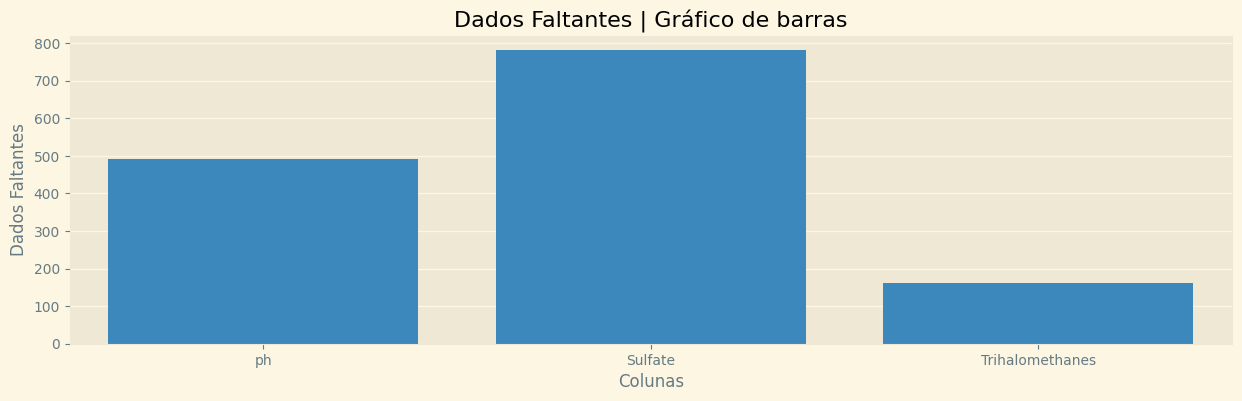

In [30]:
plt.figure(figsize=(15,4))
sns.barplot(
    x=df.isnull().sum()[(df.isnull().sum() > 0)].index,
    y=df.isnull().sum()[(df.isnull().sum() > 0)]
)
plt.title("Dados Faltantes | Gráfico de barras")
plt.xlabel("Colunas")
plt.ylabel("Dados Faltantes")

In [31]:
df.fillna(
    value= {
        'ph':df.ph.mean(),
        'Trihalomethanes':df.Trihalomethanes.mean()
    }, inplace=True)
df.drop(columns="Sulfate", inplace=True)

In [32]:
pd.DataFrame(data={
    "Percentual (%)": round((df.isnull().sum() / df.shape[0]) * 100, 3),
    "Quantidade": df.isnull().sum()
})

,Percentual (%),Quantidade
ph,0.0,0
Hardness,0.0,0
Solids,0.0,0
Chloramines,0.0,0
Conductivity,0.0,0
Organic_carbon,0.0,0
Trihalomethanes,0.0,0
Turbidity,0.0,0
Potability,0.0,0


### NORMALIZAÇÃO

In [33]:
X = df.drop(['Potability'], axis=1)
y = df.Potability

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=2024)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2620, 8)
(656, 8)
(2620,)
(656,)


In [35]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

dataset_standart_train = pd.DataFrame(
    data=X_train.tolist(),
    columns=X.columns
)
dataset_standart_train['Potability']=y_train.tolist()

dataset_standart_test = pd.DataFrame(
    data=X_test.tolist(),
    columns=X.columns
)
dataset_standart_test['Potability']=y_test.tolist()

In [36]:
display(dataset_standart_train.head(n=3))
display(dataset_standart_test.head(n=3))

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.001067,-1.988743,-0.059232,0.065902,-0.447865,0.170714,-2.577280,0.960783,1
1,0.051393,-1.070033,0.394411,1.940758,-1.198157,0.354426,-0.985578,0.403919,1
2,-0.043633,-0.804413,-0.225934,-1.186378,1.065193,0.372145,-0.119101,1.179580,1


,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,1.318415,-0.823541,-2.036460,-0.831399,0.557877,0.574673,-0.241809,-1.481409,0
1,-0.194573,-0.937569,-0.498982,-1.340859,-0.700690,0.260039,1.942884,0.086184,0
2,0.213070,0.690166,-1.602566,-0.513522,1.139277,0.274742,-1.008232,1.154711,0


### BALANCEAMENTO DO ATRIBUTO ALVO

Text(0.5, 1.0, 'Gráfico de pizza (Atributo alvo)')

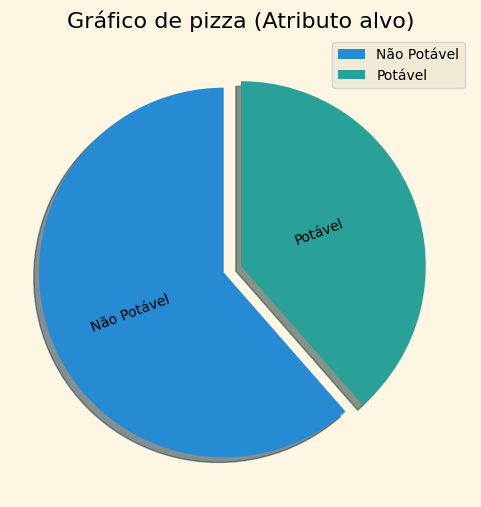

In [37]:
plt.figure(figsize=(6,6))
plt.pie(
        x=dataset_standart_train['Potability'].value_counts(),
        explode=[0.1, 0],
        labels=['Não Potável', 'Potável'], 
        shadow=True,
        labeldistance=0.3,
        startangle=90,
        rotatelabels=True
)
plt.legend()
plt.title('Gráfico de pizza (Atributo alvo)')